In [3]:
!pip install google-play-scraper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.7 MB/s eta 0:00:00


In [4]:
from google_play_scraper import Sort, reviews
import pandas as pd

# Get reviews for Netflix (package name from Play Store URL)
result, _ = reviews(
    'com.netflix.mediaclient',  # Netflix Android app package name
    lang='en',
    country='us',
    sort=Sort.NEWEST,
    count=200,  # You can change this to 500, 1000, etc.
)

# Convert to DataFrame
df = pd.DataFrame(result)

# Preview
print(df[['content', 'score', 'at']].head())

# Save to CSV
df.to_csv("netflix_app_reviews.csv", index=False)



                                             content  score  \
0  Still detected as signed in in other device de...      1   
1                                          not email      1   
2  is very hard to find the option for downloads ...      3   
3  I can't able to see the series the picture is ...      2   
4                                        U. Srinivas      5   

                   at  
0 2025-05-20 14:50:22  
1 2025-05-20 14:40:41  
2 2025-05-20 14:37:20  
3 2025-05-20 14:36:56  
4 2025-05-20 14:29:09  


In [6]:
from google.colab import files
files.download("netflix_app_reviews.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Add a binary churn flag based on keywords
df['churn_flag'] = df['content'].str.contains(
    'cancel|unsubscribe|delete|quit|leaving|stopped|remove|not worth|waste|hate|uninstall',
    case=False, na=False
)


In [ ]:
df['churn_flag'].value_counts()


,count
churn_flag,
False,187
True,13


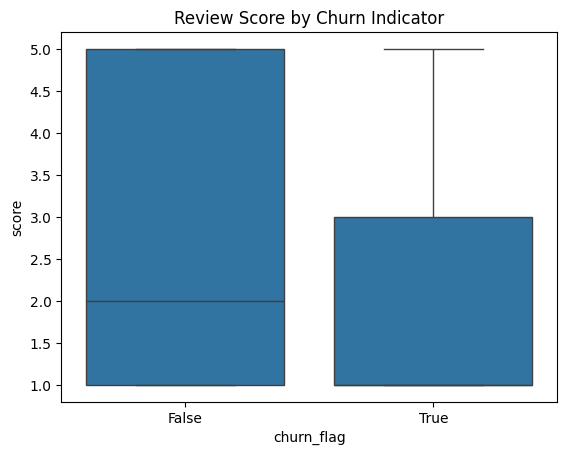

Estimated churn-related reviews: 6.50%


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of review scores by churn label
sns.boxplot(data=df, x='churn_flag', y='score')
plt.title('Review Score by Churn Indicator')
plt.show()

# Churn rate
churn_rate = df['churn_flag'].mean()
print(f"Estimated churn-related reviews: {churn_rate:.2%}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Feature extraction
X = df['content']
y = df['churn_flag']

vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
X_vec = vectorizer.fit_transform(X)

# Step 2: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Step 3: Fit model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       False       0.95      1.00      0.97        38
        True       0.00      0.00      0.00         2

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
